In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                                  Open        High         Low       Close  \
Datetime                                                                    
2023-03-24 09:15:00+05:30  381.700012  382.350006  380.399994  381.649994   
2023-03-24 09:16:00+05:30  381.549988  381.950012  381.149994  381.649994   
2023-03-24 09:17:00+05:30  381.700012  381.750000  381.299988  381.700012   
2023-03-24 09:18:00+05:30  381.700012  382.149994  381.600006  381.799988   
2023-03-24 09:19:00+05:30  381.799988  382.250000  381.750000  382.000000   
...                               ...         ...         ...         ...   
2023-03-24 15:25:00+05:30  378.649994  378.700012  378.500000  378.700012   
2023-03-24 15:26:00+05:30  378.700012  378.850006  378.549988  378.850006   
2023-03-24 15:27:00+05:30  378.649994  379.200012  378.649994  379.200012   
2023-03-24 15:28:00+05:30  379.299988  379.299988  379.000000  379.000000   
2023-03-24 15:29:00+05:30  378.700012  378.899

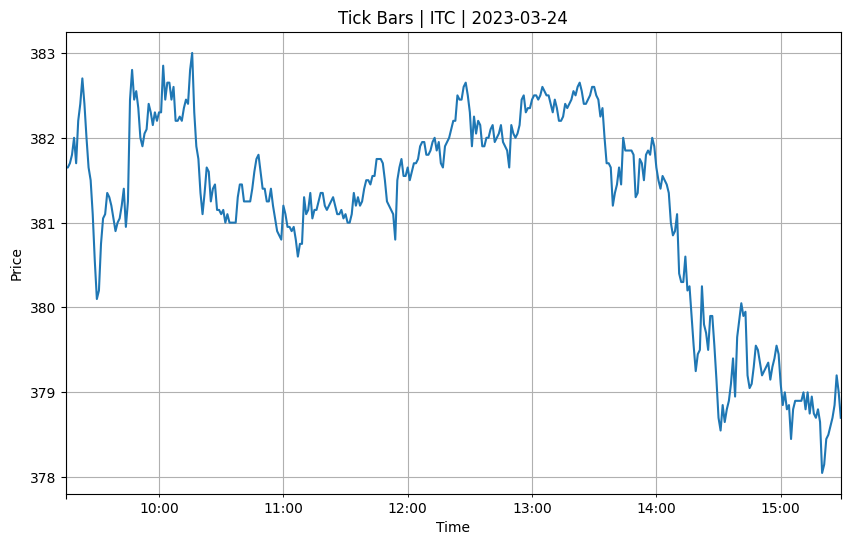

In [23]:
date="2023-03-24"
data = yf.download("ITC.NS",period="1d", interval="1m")

# Create figure(10 by 6) and axis 
fig, ax = plt.subplots(figsize=(10, 6))
data['Close'].plot(ax = ax)

# Set title and label
ax.set_title(f"Tick Bars | ITC | {date}")
ax.set_xlabel("Time")
ax.set_ylabel("Price")

# Adding Grid lines
ax.grid(True, which='both')

# Date Formatter
# ax.xaxis.set_major_formatter(plt.FixedFormatter(data.index.strftime('%H:%M')))

#plt.show()
data.head

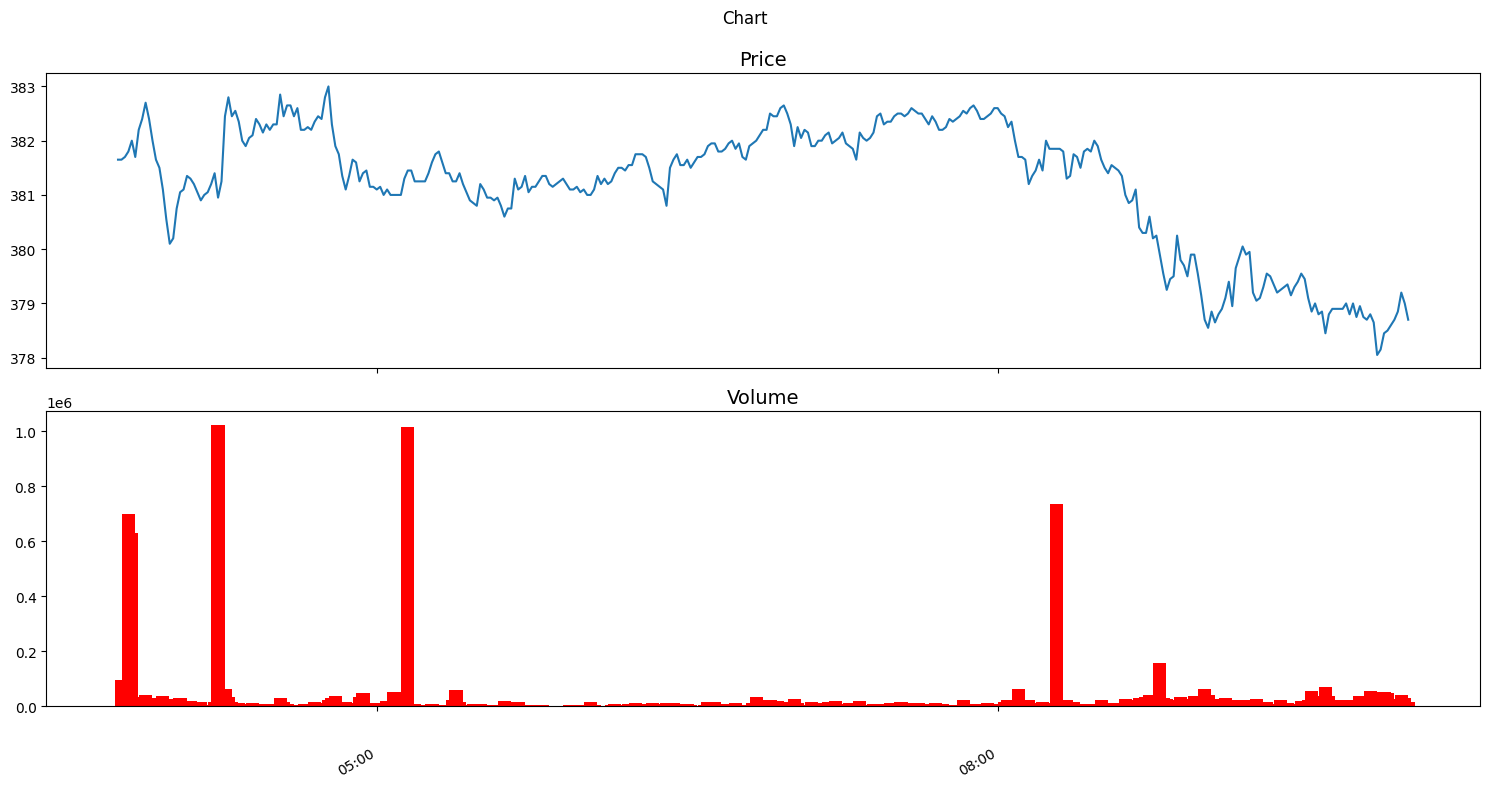

In [28]:
def price_volume(df, price='close', vol='Volume', subtitle='Chart', fname=None):
    fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
    axes[0].plot(df.index, df['Close'])
    axes[1].bar(df.index, df['Volume'], width= 1/(len(df['Volume'])),color='r')
    xfmt = mpl.DateFormatter('%H:%M')
    axes[1].xaxis.set_major_locator(mpl.HourLocator(interval=3))
    axes[1].xaxis.set_major_formatter(xfmt)
    axes[1].get_xaxis().set_tick_params(which='major', pad=25)
    axes[0].set_title('Price', fontsize=14)
    axes[1].set_title('Volume', fontsize=14)
    fig.autofmt_xdate()
    fig.suptitle(subtitle)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
price_volume(data)